## Problem Statement

The IPL is a fast-paced T20 league, and understanding match trends can be complex. This project analyzes **ball-by-ball data (2008-2023)** to explore **batting, bowling, match results, and venue impact** using **Exploratory Data Analysis (EDA)** to uncover key insights.

## **Dataset Info:**

**Match ID** : Unique identifier for each match.

**Date**: Date on which the match was played.

**Venue** : Name of the stadium where the match was played.

**Bat First** : Name of the team that batted first.

**Bat Second** : Name of the team that batted second.

**Innings** : Indicates the inning number (1 or 2) of the match.

**Over** : Specifies the over number within the inning.

**Ball** : Denotes the ball number within the over.

**Batter** : Name of the batsman facing the delivery.

**Non Striker** : Name of the non-striking batsman.

**Bowler** : Name of the bowler delivering the ball.

**Batter Runs** : Runs scored by the batsman on that specific delivery.

**Extra Runs** : Additional runs awarded due to extras like wides or no-balls.

**Runs From Ball** : Total runs scored from that delivery (batsman + extras).

**Ball Rebowled** : Indicator if the ball was rebowled (e.g., after a no-ball).

**Extra Type** : Type of extra run conceded (e.g., wide, no-ball, leg bye, bye).

**Wicket** : Indicates if a wicket fell on that delivery (1 for yes, 0 for no).

**Method** : Type of dismissal (e.g., bowled, caught, run out, etc.).

**Player Out** : Name of the dismissed player, if applicable.

**Innings Runs** : Total runs scored in the inning up to that ball.

**Innings Wickets** : Total number of wickets lost in the inning up to that ball.

**Target Score** : The target score set by the batting team (useful in chases).

**Runs to Get** : Runs required to win the match (only in chases).

**Balls Remaining** : Number of balls left in the innings.

**Winner** : Name of the team that won the match.

**Chased Successfully** : Indicator if the target was successfully chased (1 for yes, 0 for no).

**Total Batter Runs** : The total runs accumulated by the batter up until this delivery in the innings

**Total Non Striker Runs** : The total runs accumulated by the non-striker up until this delivery in the innings

**Batter Balls Faced** : The number of valid deliveries faced by the batter up until this delivery in the innings.

**Non Striker Balls Faced** : The number of valid deliveries faced by the non-striker up until this delivery in the innings.

**Player Out Runs** : The total runs scored by the dismissed player before getting out

**Player Out Balls Faced** : The number of valid deliveries faced by the dismissed player before getting out

**Bowler Runs Conceded** : Total runs conceded by the bowler in that ball.

**Valid Ball** : Indicates if the delivery was a valid ball (not wide/no-ball).

## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **Load Data**

In [2]:
df = pd.read_csv('/content/ball_by_ball_ipl.csv', index_col = 0)

### **Dataset Overview & Structure**

In [3]:
df.head(10)

,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,...,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,1,RD Gaikwad,DP Conway,...,Chennai Super Kings,0,4,0,1,0,NaN,NaN,4,1
1,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,2,RD Gaikwad,DP Conway,...,Chennai Super Kings,0,4,0,2,0,NaN,NaN,0,1
2,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,3,RD Gaikwad,DP Conway,...,Chennai Super Kings,0,4,0,3,0,NaN,NaN,0,1
3,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,4,RD Gaikwad,DP Conway,...,Chennai Super Kings,0,4,0,4,0,NaN,NaN,0,1
4,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,5,RD Gaikwad,DP Conway,...,Chennai Super Kings,0,5,0,5,0,NaN,NaN,1,1
5,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,6,DP Conway,RD Gaikwad,...,Chennai Super Kings,0,0,5,1,5,NaN,NaN,0,1
6,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,2,1,RD Gaikwad,DP Conway,...,Chennai Super Kings,0,6,0,6,1,NaN,NaN,1,1
7,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,2,2,DP Conway,RD Gaikwad,...,Chennai Super Kings,0,0,6,2,6,NaN,NaN,0,1
8,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,2,3,DP Conway,RD Gaikwad,...,Chennai Super Kings,0,1,6,3,6,NaN,NaN,1,1
9,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,2,4,RD Gaikwad,DP Conway,...,Chennai Super Kings,0,7,1,7,3,NaN,NaN,1,1


In [4]:
df.tail()

,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,...,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
239688,1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Daredevils,Sunrisers Hyderabad,2,20,1,YK Pathan,KS Williamson,...,Sunrisers Hyderabad,1,16,31,9,29,NaN,NaN,2,1
239689,1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Daredevils,Sunrisers Hyderabad,2,20,2,YK Pathan,KS Williamson,...,Sunrisers Hyderabad,1,22,31,10,29,NaN,NaN,6,1
239690,1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Daredevils,Sunrisers Hyderabad,2,20,3,YK Pathan,KS Williamson,...,Sunrisers Hyderabad,1,26,31,11,29,NaN,NaN,4,1
239691,1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Daredevils,Sunrisers Hyderabad,2,20,4,YK Pathan,KS Williamson,...,Sunrisers Hyderabad,1,27,31,12,29,NaN,NaN,1,1
239692,1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Daredevils,Sunrisers Hyderabad,2,20,5,KS Williamson,YK Pathan,...,Sunrisers Hyderabad,1,32,27,30,12,NaN,NaN,1,1


In [5]:
df.shape

(239693, 34)

#### **Identifying key columns and understanding data types**

In [6]:
df.columns

Index(['Match ID', 'Date', 'Venue', 'Bat First', 'Bat Second', 'Innings',
       'Over', 'Ball', 'Batter', 'Non Striker', 'Bowler', 'Batter Runs',
       'Extra Runs', 'Runs From Ball', 'Ball Rebowled', 'Extra Type', 'Wicket',
       'Method', 'Player Out', 'Innings Runs', 'Innings Wickets',
       'Target Score', 'Runs to Get', 'Balls Remaining', 'Winner',
       'Chased Successfully', 'Total Batter Runs', 'Total Non Striker Runs',
       'Batter Balls Faced', 'Non Striker Balls Faced', 'Player Out Runs',
       'Player Out Balls Faced', 'Bowler Runs Conceded', 'Valid Ball'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239693 entries, 0 to 239692
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Match ID                 239693 non-null  int64  
 1   Date                     239693 non-null  object 
 2   Venue                    239693 non-null  object 
 3   Bat First                239693 non-null  object 
 4   Bat Second               239693 non-null  object 
 5   Innings                  239693 non-null  int64  
 6   Over                     239693 non-null  int64  
 7   Ball                     239693 non-null  int64  
 8   Batter                   239693 non-null  object 
 9   Non Striker              239693 non-null  object 
 10  Bowler                   239693 non-null  object 
 11  Batter Runs              239693 non-null  int64  
 12  Extra Runs               239693 non-null  int64  
 13  Runs From Ball           239693 non-null  int64  
 14  Ball Rebo

In [8]:
df.dtypes

,0
Match ID,int64
Date,object
Venue,object
Bat First,object
Bat Second,object
Innings,int64
Over,int64
Ball,int64
Batter,object
Non Striker,object


In [9]:
df.size #it will gives non nan or null element

8149562

**DATA CLEANING**

**Standardizing Categorical values**

Before moving to analysis, ensure data consistency in categorical values:
Checking key categorical columns prevents errors in grouping, filtering, and aggregations


In [10]:
categorical_columns = df.select_dtypes(include= ['object','category']).columns.tolist()

In [11]:
df['Venue'].unique()

array(['Eden Gardens', 'De Beers Diamond Oval', 'Sharjah Cricket Stadium',
       'Wankhede Stadium', 'Feroz Shah Kotla', 'Holkar Cricket Stadium',
       'Punjab Cricket Association IS Bindra Stadium',
       'Maharashtra Cricket Association Stadium',
       'MA Chidambaram Stadium', 'Dubai International Cricket Stadium',
       'Kingsmead', 'Dr DY Patil Sports Academy', 'SuperSport Park',
       'Sawai Mansingh Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'M Chinnaswamy Stadium', 'Rajiv Gandhi International Stadium',
       'Brabourne Stadium', 'Sheikh Zayed Stadium',
       'M.Chinnaswamy Stadium', 'Punjab Cricket Association Stadium',
       'Narendra Modi Stadium', 'Arun Jaitley Stadium',
       'Barabati Stadium', 'Saurashtra Cricket Association Stadium',
       'Sardar Patel Stadium',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Green Park', 'Subrata Roy Sahara Stadium',
       'JSCA International Stadium Complex'

In [12]:
venue_map = {
    "M.Chinnaswamy Stadium": "M Chinnaswamy Stadium",
    "Sardar Patel Stadium": "Narendra Modi Stadium",
    "Punjab Cricket Association IS Bindra Stadium": "Punjab Cricket Association Stadium",
    "Feroz Shah Kotla": "Arun Jaitley Stadium",
    "Zayed Cricket Stadium": "Sheikh Zayed Stadium",
    "De Beers Diamond Oval": "Kimberley Oval",
    "Rajiv Gandhi International Stadium": "Uppal Stadium",
    "Dr Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium": "ACA-VDCA Stadium",
    "Shaheed Veer Narayan Singh International Stadium": "Raipur International Cricket Stadium",
    "JSCA International Stadium Complex": "Ranchi Stadium",
    "Barsapara Cricket Stadium": "Assam Cricket Association Stadium"
}

df['venue'] = df['Venue'].replace(venue_map)

In [13]:
df['Bat First'].unique()

array(['Chennai Super Kings', 'Rajasthan Royals', 'Mumbai Indians',
       'Delhi Daredevils', 'Royal Challengers Bangalore',
       'Delhi Capitals', 'Sunrisers Hyderabad', 'Rising Pune Supergiants',
       'Punjab Kings', 'Kings XI Punjab', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Deccan Chargers', 'Kolkata Knight Riders',
       'Gujarat Titans', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Lucknow Super Giants'], dtype=object)

In [14]:
df['Bat Second'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Capitals',
       'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Delhi Daredevils',
       'Mumbai Indians', 'Gujarat Titans', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Sunrisers Hyderabad', 'Lucknow Super Giants', 'Punjab Kings',
       'Pune Warriors', 'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant'], dtype=object)

In [15]:
df['Winner'].unique()

array(['Chennai Super Kings', 'Delhi Capitals', 'Mumbai Indians',
       'Kings XI Punjab', 'Kochi Tuskers Kerala',
       'Royal Challengers Bangalore', 'Gujarat Titans', 'Punjab Kings',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Pune Warriors',
       'Rajasthan Royals', 'Sunrisers Hyderabad', 'Lucknow Super Giants',
       'Deccan Chargers', 'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant'], dtype=object)

In [16]:
team_name_map = {
    "Delhi Daredevils": "Delhi Capitals",
    "Kings XI Punjab": "Punjab Kings"
}
df['Bat First'] = df['Bat First'].replace(team_name_map)
df['Bat Second'] = df['Bat Second'].replace(team_name_map)
df['Winner'] = df['Winner'].replace(team_name_map)

**CLEANING PLAYER NAMES**

In [17]:
df['Batter'].unique()

array(['RD Gaikwad', 'DP Conway', 'AM Rahane', 'S Dube', 'RA Jadeja',
       'MS Dhoni', 'N Jagadeesan', 'SP Narine', 'VR Iyer', 'N Rana',
       'JJ Roy', 'RK Singh', 'AD Russell', 'D Wiese', 'UT Yadav',
       'CV Varun', 'GC Smith', 'NV Ojha', 'SA Asnodkar', 'YK Pathan',
       'LA Carseldine', 'AS Raut', 'SK Warne', 'SM Harwood', 'M Vijay',
       'ML Hayden', 'SK Raina', 'S Badrinath', 'JDP Oram', 'RG Sharma',
       'Q de Kock', 'SA Yadav', 'SS Tiwary', 'KA Pollard', 'HH Pandya',
       'KH Pandya', 'NM Coulter-Nile', 'J Yadav', 'JJ Bumrah', 'PP Shaw',
       'S Dhawan', 'SPD Smith', 'RR Pant', 'SS Iyer', 'AR Patel',
       'SO Hetmyer', 'R Ashwin', 'LMP Simmons', 'PA Patel', 'AT Rayudu',
       'Harbhajan Singh', 'J Suchith', 'DR Smith', 'F du Plessis',
       'MEK Hussey', 'DJ Bravo', 'P Negi', 'MM Sharma', 'A Nehra',
       'G Gambhir', 'V Sehwag', 'TM Dilshan', 'MF Maharoof',
       'Shoaib Malik', 'SE Marsh', 'JR Hopes', 'Yuvraj Singh',
       'LA Pomersbach', 'DPMD Jayaward

In [18]:
df['Batter'] = df['Batter'].str.strip().str.title() #str.strip removes the spaces between starting and ending of a string
#title makes the first letter as capital in each word
df['Non Striker'] = df['Non Striker'].str.strip().str.title()
df['Bowler'] = df['Bowler'].str.strip().str.title()
df['Player Out'] = df['Player Out'].str.strip().str.title()

**HANDLING MISSING & DUPLICATED DATA**

In [19]:
df.info() #check the method and some other doesnt have values

<class 'pandas.core.frame.DataFrame'>
Index: 239693 entries, 0 to 239692
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Match ID                 239693 non-null  int64  
 1   Date                     239693 non-null  object 
 2   Venue                    239693 non-null  object 
 3   Bat First                239693 non-null  object 
 4   Bat Second               239693 non-null  object 
 5   Innings                  239693 non-null  int64  
 6   Over                     239693 non-null  int64  
 7   Ball                     239693 non-null  int64  
 8   Batter                   239693 non-null  object 
 9   Non Striker              239693 non-null  object 
 10  Bowler                   239693 non-null  object 
 11  Batter Runs              239693 non-null  int64  
 12  Extra Runs               239693 non-null  int64  
 13  Runs From Ball           239693 non-null  int64  
 14  Ball Rebo

In [20]:
df.isna().sum() #sum will see the True where is present if true means it will sum it and it will represent the sum of missing/empty/undefined value in the dataset

,0
Match ID,0
Date,0
Venue,0
Bat First,0
Bat Second,0
Innings,0
Over,0
Ball,0
Batter,0
Non Striker,0


**OBSERVATIONS**

* **Method** has **227,866 missing values** because it is only applicable when a wicket falls. It is **NaN for deliveries where no wicket fell**.  
* **Player Out** has **227,866 missing values** as it is recorded only when a wicket falls, making it **NaN for non-wicket deliveries**.  
* **Player Out Runs** has **227,866 missing values** because it is missing for deliveries where no player was out.  
* **Player Out Balls Faced** has **227,866 missing values** for the same reason—it is recorded only when a player gets out.  
* **Runs to Get** has **123,927 missing values** as it is **only relevant for the second innings**, making it **NaN for the first innings**.

In [21]:
df.dropna()

,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,...,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball,venue
126,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,2,1,4,Sp Narine,N Jagadeesan,...,0,0,1,0,1,0.0,3.0,0,1,Eden Gardens
130,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,2,2,2,N Jagadeesan,Vr Iyer,...,0,0,0,0,2,1.0,3.0,0,1,Eden Gardens
167,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,2,8,1,Vr Iyer,N Rana,...,0,0,22,0,18,20.0,20.0,0,1,Eden Gardens
174,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,2,9,2,N Rana,Jj Roy,...,0,0,19,0,4,27.0,21.0,0,1,Eden Gardens
213,1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,2,15,3,Jj Roy,Rk Singh,...,0,0,21,0,16,61.0,27.0,0,1,Eden Gardens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239434,598012,2013-04-13,MA Chidambaram Stadium,Royal Challengers Bangalore,Chennai Super Kings,2,19,1,Ms Dhoni,Ra Jadeja,...,1,0,26,0,16,33.0,24.0,0,1,MA Chidambaram Stadium
239438,598012,2013-04-13,MA Chidambaram Stadium,Royal Challengers Bangalore,Chennai Super Kings,2,19,4,Dj Bravo,Ra Jadeja,...,1,0,26,0,16,8.0,4.0,0,1,MA Chidambaram Stadium
239624,1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Capitals,Sunrisers Hyderabad,2,9,6,Ad Hales,S Dhawan,...,1,0,28,0,24,45.0,31.0,0,1,Uppal Stadium
239637,1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Capitals,Sunrisers Hyderabad,2,11,6,S Dhawan,Ks Williamson,...,1,0,4,0,6,33.0,31.0,0,1,Uppal Stadium


In [22]:
df['Method'].fillna('Not Out', inplace = True) #here inplace = True will modify the orginal column/series
df['Player Out'].fillna('None', inplace = True) #if the player is not out the value will be empty instaed of it we will replace with None
df['Player Out Runs'].fillna(0, inplace = True) #if that particular ball is the player is not out we will put 0
df['Player Out Balls Faced'].fillna(0, inplace = True)


**CHECK FOR DUPLICATES**

In [23]:
df.duplicated().sum()#check the each row if the row is seen before in the dataset return true else false

np.int64(0)

**DATA TYPE CORRECTIONS**

**Match ID** should be converted from **int64** to **str** because it represents a categorical value, not a numerical one.

**Date** should be converted from **object** to **datetime64** since it is needed for time-series analysis.

**Ball Reboweled** should be converted from **int64** to **bool** by mapping 1 → True and 0 → False.

**Runs to Get** should be converted from **float64** to **int64** because runs are always whole numbers.

**Player Out Runs** should be converted from **object** to **int64** because it should be a numeric column.

**Player Out Balls** Faced should be converted from **float64** to **int64** because it should be an integer.

In [24]:
df['Match ID'] = df['Match ID'].astype(str)
df['Ball Rebowled'] = df['Ball Rebowled'].astype(bool)
df['Runs to Get'].fillna(0, inplace=True)
df['Runs to Get'] = df['Runs to Get'].astype(int)
df['Player Out Runs'].fillna(0, inplace=True)
df['Player Out Runs'] = df['Player Out Runs'].astype(int)
df['Player Out Balls Faced'].fillna(0, inplace=True)
df['Player Out Balls Faced'] = df['Player Out Balls Faced'].astype(int)
df['Date'] = pd.to_datetime(df['Date'])

**FEATURE ENGINEERING**

In [25]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

In [26]:
df['is_six'] = (df['Batter Runs'] == 6 ).astype(int) #the true or false will be converted to 0 or 1 by using this astype(int) here we were creating is_six a new column

In [27]:
df['Method'].unique()

array(['Not Out', 'bowled', 'caught', 'lbw', 'stumped', 'run out',
       'caught and bowled', 'retired hurt', 'hit wicket', 'retired out',
       'obstructing the field'], dtype=object)

In [28]:
valid_methods = ['bowled', 'caught','lbw', 'stumped','caught and bowled', 'hit wicket']
df['bowler_wickets'] = df['Method'].isin(valid_methods).astype(int) #isin here it will checks the the valid_list values are there in the Metod if it is there it will return true else return false


In [29]:
df['is_dot_ball'] = ((df['Runs From Ball'] == 0) & (df['Valid Ball'] )).astype(int) #& for element wise or bit wise we will use '&' as and


**Testing phase 1 Warmimg up**

In [30]:
df[['Batter', 'Method']] #it is only for selecting the columns it will doesnt support to select the rows

,Batter,Method
0,Rd Gaikwad,Not Out
1,Rd Gaikwad,Not Out
2,Rd Gaikwad,Not Out
3,Rd Gaikwad,Not Out
4,Rd Gaikwad,Not Out
...,...,...
239688,Yk Pathan,Not Out
239689,Yk Pathan,Not Out
239690,Yk Pathan,Not Out
239691,Yk Pathan,Not Out


In [31]:
df.set_index('Match ID',inplace = True)

In [32]:
df

,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,Bowler,...,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball,venue,Year,is_six,bowler_wickets,is_dot_ball
Match ID,,,,,,,,,,,,,,,,,,,,,
1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,1,Rd Gaikwad,Dp Conway,Ut Yadav,...,0,0,0,4,1,Eden Gardens,2023,0,0,0
1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,2,Rd Gaikwad,Dp Conway,Ut Yadav,...,0,0,0,0,1,Eden Gardens,2023,0,0,1
1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,3,Rd Gaikwad,Dp Conway,Ut Yadav,...,0,0,0,0,1,Eden Gardens,2023,0,0,1
1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,4,Rd Gaikwad,Dp Conway,Ut Yadav,...,0,0,0,0,1,Eden Gardens,2023,0,0,1
1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,5,Rd Gaikwad,Dp Conway,Ut Yadav,...,0,0,0,1,1,Eden Gardens,2023,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Capitals,Sunrisers Hyderabad,2,20,1,Yk Pathan,Ks Williamson,Dt Christian,...,29,0,0,2,1,Uppal Stadium,2018,0,0,0
1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Capitals,Sunrisers Hyderabad,2,20,2,Yk Pathan,Ks Williamson,Dt Christian,...,29,0,0,6,1,Uppal Stadium,2018,1,0,0
1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Capitals,Sunrisers Hyderabad,2,20,3,Yk Pathan,Ks Williamson,Dt Christian,...,29,0,0,4,1,Uppal Stadium,2018,0,0,0


In [33]:
df.loc[['1136596', '1359507']]  #like this we will may can select the multiple columns which we want this is for row selection

,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,Bowler,...,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball,venue,Year,is_six,bowler_wickets,is_dot_ball
Match ID,,,,,,,,,,,,,,,,,,,,,
1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Capitals,Sunrisers Hyderabad,1,1,1,Pp Shaw,Gj Maxwell,B Kumar,...,0,0,0,0,1,Uppal Stadium,2018,0,0,1
1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Capitals,Sunrisers Hyderabad,1,1,2,Pp Shaw,Gj Maxwell,B Kumar,...,0,0,0,0,1,Uppal Stadium,2018,0,0,1
1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Capitals,Sunrisers Hyderabad,1,1,3,Pp Shaw,Gj Maxwell,B Kumar,...,0,0,0,1,1,Uppal Stadium,2018,0,0,0
1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Capitals,Sunrisers Hyderabad,1,1,4,Gj Maxwell,Pp Shaw,B Kumar,...,3,0,0,1,1,Uppal Stadium,2018,0,0,0
1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Capitals,Sunrisers Hyderabad,1,1,5,Pp Shaw,Gj Maxwell,B Kumar,...,1,0,0,0,1,Uppal Stadium,2018,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,2,20,2,Rk Singh,Cv Varun,M Pathirana,...,3,0,0,0,1,Eden Gardens,2023,0,0,1
1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,2,20,3,Rk Singh,Cv Varun,M Pathirana,...,3,0,0,6,1,Eden Gardens,2023,1,0,0
1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,2,20,4,Rk Singh,Cv Varun,M Pathirana,...,3,0,0,0,1,Eden Gardens,2023,0,0,1


In [34]:
df.loc[:,'Bat First'] #df.loc[row,columns] ':' this means all the rows will be considered and the column that only column will be selected

,Bat First
Match ID,
1359507,Chennai Super Kings
1359507,Chennai Super Kings
1359507,Chennai Super Kings
1359507,Chennai Super Kings
1359507,Chennai Super Kings
...,...
1136596,Delhi Capitals
1136596,Delhi Capitals
1136596,Delhi Capitals


In [35]:
df.loc[:,['Bat First', 'Venue']]

,Bat First,Venue
Match ID,,
1359507,Chennai Super Kings,Eden Gardens
1359507,Chennai Super Kings,Eden Gardens
1359507,Chennai Super Kings,Eden Gardens
1359507,Chennai Super Kings,Eden Gardens
1359507,Chennai Super Kings,Eden Gardens
...,...,...
1136596,Delhi Capitals,Rajiv Gandhi International Stadium
1136596,Delhi Capitals,Rajiv Gandhi International Stadium
1136596,Delhi Capitals,Rajiv Gandhi International Stadium


In [36]:
df.loc['1359507':'1136596'] #df.loc[row_lable_start:row_label_end] here important point is both start and end are inclusive

,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,Bowler,...,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball,venue,Year,is_six,bowler_wickets,is_dot_ball
Match ID,,,,,,,,,,,,,,,,,,,,,
1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,1,Rd Gaikwad,Dp Conway,Ut Yadav,...,0,0,0,4,1,Eden Gardens,2023,0,0,0
1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,2,Rd Gaikwad,Dp Conway,Ut Yadav,...,0,0,0,0,1,Eden Gardens,2023,0,0,1
1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,3,Rd Gaikwad,Dp Conway,Ut Yadav,...,0,0,0,0,1,Eden Gardens,2023,0,0,1
1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,4,Rd Gaikwad,Dp Conway,Ut Yadav,...,0,0,0,0,1,Eden Gardens,2023,0,0,1
1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,5,Rd Gaikwad,Dp Conway,Ut Yadav,...,0,0,0,1,1,Eden Gardens,2023,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Capitals,Sunrisers Hyderabad,2,20,1,Yk Pathan,Ks Williamson,Dt Christian,...,29,0,0,2,1,Uppal Stadium,2018,0,0,0
1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Capitals,Sunrisers Hyderabad,2,20,2,Yk Pathan,Ks Williamson,Dt Christian,...,29,0,0,6,1,Uppal Stadium,2018,1,0,0
1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Capitals,Sunrisers Hyderabad,2,20,3,Yk Pathan,Ks Williamson,Dt Christian,...,29,0,0,4,1,Uppal Stadium,2018,0,0,0


In [37]:
df.loc[:, 'Venue':'Ball'] #column slicing

,Venue,Bat First,Bat Second,Innings,Over,Ball
Match ID,,,,,,
1359507,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,1
1359507,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,2
1359507,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,3
1359507,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,4
1359507,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,5
...,...,...,...,...,...,...
1136596,Rajiv Gandhi International Stadium,Delhi Capitals,Sunrisers Hyderabad,2,20,1
1136596,Rajiv Gandhi International Stadium,Delhi Capitals,Sunrisers Hyderabad,2,20,2
1136596,Rajiv Gandhi International Stadium,Delhi Capitals,Sunrisers Hyderabad,2,20,3


In [38]:
df.loc[df['Bat First'] != 'Chennai Super Kings'] #.loc[]-conditional row selection

,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,Bowler,...,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball,venue,Year,is_six,bowler_wickets,is_dot_ball
Match ID,,,,,,,,,,,,,,,,,,,,,
392217,2009-05-09,De Beers Diamond Oval,Rajasthan Royals,Chennai Super Kings,1,1,1,Gc Smith,Nv Ojha,Ja Morkel,...,0,0,0,1,1,Kimberley Oval,2009,0,0,0
392217,2009-05-09,De Beers Diamond Oval,Rajasthan Royals,Chennai Super Kings,1,1,2,Nv Ojha,Gc Smith,Ja Morkel,...,1,0,0,0,1,Kimberley Oval,2009,0,0,1
392217,2009-05-09,De Beers Diamond Oval,Rajasthan Royals,Chennai Super Kings,1,1,3,Nv Ojha,Gc Smith,Ja Morkel,...,1,0,2,0,1,Kimberley Oval,2009,0,1,1
392217,2009-05-09,De Beers Diamond Oval,Rajasthan Royals,Chennai Super Kings,1,1,4,Sa Asnodkar,Gc Smith,Ja Morkel,...,1,0,0,0,1,Kimberley Oval,2009,0,0,1
392217,2009-05-09,De Beers Diamond Oval,Rajasthan Royals,Chennai Super Kings,1,1,5,Sa Asnodkar,Gc Smith,Ja Morkel,...,1,0,0,4,1,Kimberley Oval,2009,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Capitals,Sunrisers Hyderabad,2,20,1,Yk Pathan,Ks Williamson,Dt Christian,...,29,0,0,2,1,Uppal Stadium,2018,0,0,0
1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Capitals,Sunrisers Hyderabad,2,20,2,Yk Pathan,Ks Williamson,Dt Christian,...,29,0,0,6,1,Uppal Stadium,2018,1,0,0
1136596,2018-05-05,Rajiv Gandhi International Stadium,Delhi Capitals,Sunrisers Hyderabad,2,20,3,Yk Pathan,Ks Williamson,Dt Christian,...,29,0,0,4,1,Uppal Stadium,2018,0,0,0


In [39]:
df.loc['392217':'1136596', 'Venue':'Ball'] #column slicing

,Venue,Bat First,Bat Second,Innings,Over,Ball
Match ID,,,,,,
392217,De Beers Diamond Oval,Rajasthan Royals,Chennai Super Kings,1,1,1
392217,De Beers Diamond Oval,Rajasthan Royals,Chennai Super Kings,1,1,2
392217,De Beers Diamond Oval,Rajasthan Royals,Chennai Super Kings,1,1,3
392217,De Beers Diamond Oval,Rajasthan Royals,Chennai Super Kings,1,1,4
392217,De Beers Diamond Oval,Rajasthan Royals,Chennai Super Kings,1,1,5
...,...,...,...,...,...,...
1136596,Rajiv Gandhi International Stadium,Delhi Capitals,Sunrisers Hyderabad,2,20,1
1136596,Rajiv Gandhi International Stadium,Delhi Capitals,Sunrisers Hyderabad,2,20,2
1136596,Rajiv Gandhi International Stadium,Delhi Capitals,Sunrisers Hyderabad,2,20,3


In [40]:
df.iloc[[0,2,3]] #.iloc[] position based indexing df.iloc[row_index,column_index]

,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,Bowler,...,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball,venue,Year,is_six,bowler_wickets,is_dot_ball
Match ID,,,,,,,,,,,,,,,,,,,,,
1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,1,Rd Gaikwad,Dp Conway,Ut Yadav,...,0,0,0,4,1,Eden Gardens,2023,0,0,0
1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,3,Rd Gaikwad,Dp Conway,Ut Yadav,...,0,0,0,0,1,Eden Gardens,2023,0,0,1
1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,4,Rd Gaikwad,Dp Conway,Ut Yadav,...,0,0,0,0,1,Eden Gardens,2023,0,0,1


In [41]:
df.iloc[1:3,0:3]

,Date,Venue,Bat First
Match ID,,,
1359507,2023-04-23,Eden Gardens,Chennai Super Kings
1359507,2023-04-23,Eden Gardens,Chennai Super Kings


In [42]:
df.loc[df['Over'].idxmax()]

,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,Bowler,...,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball,venue,Year,is_six,bowler_wickets,is_dot_ball
Match ID,,,,,,,,,,,,,,,,,,,,,
1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,1,Rd Gaikwad,Dp Conway,Ut Yadav,...,0,0,0,4,1,Eden Gardens,2023,0,0,0
1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,2,Rd Gaikwad,Dp Conway,Ut Yadav,...,0,0,0,0,1,Eden Gardens,2023,0,0,1
1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,3,Rd Gaikwad,Dp Conway,Ut Yadav,...,0,0,0,0,1,Eden Gardens,2023,0,0,1
1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,4,Rd Gaikwad,Dp Conway,Ut Yadav,...,0,0,0,0,1,Eden Gardens,2023,0,0,1
1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,1,1,5,Rd Gaikwad,Dp Conway,Ut Yadav,...,0,0,0,1,1,Eden Gardens,2023,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,2,20,2,Rk Singh,Cv Varun,M Pathirana,...,3,0,0,0,1,Eden Gardens,2023,0,0,1
1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,2,20,3,Rk Singh,Cv Varun,M Pathirana,...,3,0,0,6,1,Eden Gardens,2023,1,0,0
1359507,2023-04-23,Eden Gardens,Chennai Super Kings,Kolkata Knight Riders,2,20,4,Rk Singh,Cv Varun,M Pathirana,...,3,0,0,0,1,Eden Gardens,2023,0,0,1


**DESCRIPTIVR ANALYSIS AND AGGREGATION**

In [43]:
df["Batter Runs"].mean()

np.float64(1.2523728269077528)

In [44]:
df["is_six"].sum()

np.int64(11594)

In [45]:
df["Batter Runs"].min()

0

In [46]:
df["Batter Runs"].max()

6

In [47]:
df.loc[df["Batter"] == "V Kohli"]["Batter Runs"].sum()

np.int64(7122)

In [48]:
df.groupby('Batter')['Batter Runs'].sum().sort_values(ascending=False).head(10)#Aggregation and Groupping syntax: df.groupby('column_name').functiion()

,Batter Runs
Batter,
V Kohli,7122
S Dhawan,6573
Da Warner,6310
Rg Sharma,6165
Sk Raina,5512
Ms Dhoni,5082
Ab De Villiers,5001
Rv Uthappa,4941
Ch Gayle,4875


**EDA**

**1.Who scored the highest total runs in each IPL season (Orange Cap winners)?**

****

In [49]:
batter_yearly_runs = df.groupby(['Year', 'Batter'])['Batter Runs'].sum().reset_index()
indexes_orange_cap = batter_yearly_runs.groupby('Year')['Batter Runs'].idxmax()
batter_yearly_runs.loc[indexes_orange_cap]

,Year,Batter,Batter Runs
116,2008,Se Marsh,616
230,2009,Ml Hayden,572
444,2010,Sr Tendulkar,618
500,2011,Ch Gayle,608
682,2012,Ch Gayle,733
908,2013,Mek Hussey,733
1084,2014,Rv Uthappa,660
1144,2015,Da Warner,562
1379,2016,V Kohli,973
1418,2017,Da Warner,641


In [50]:
batter_yearly_runs = df.groupby(['Year', 'Batter'])['Batter Runs'].sum().reset_index()

orange_cap_winners = batter_yearly_runs.loc[batter_yearly_runs.groupby('Year')['Batter Runs'].idxmax()]


orange_cap_winners = orange_cap_winners.rename(columns={'Batter Runs': 'Total Runs in Season'})


orange_cap_winners = orange_cap_winners.sort_values('Year')



print(orange_cap_winners)

      Year         Batter  Total Runs in Season
116   2008       Se Marsh                   616
230   2009      Ml Hayden                   572
444   2010   Sr Tendulkar                   618
500   2011       Ch Gayle                   608
682   2012       Ch Gayle                   733
908   2013     Mek Hussey                   733
1084  2014     Rv Uthappa                   660
1144  2015      Da Warner                   562
1379  2016        V Kohli                   973
1418  2017      Da Warner                   641
1589  2018  Ks Williamson                   735
1689  2019      Da Warner                   692
1906  2020       S Dhawan                   618
2046  2021     Rd Gaikwad                   635
2137  2022     Jc Buttler                   863
2408  2023   Shubman Gill                   890


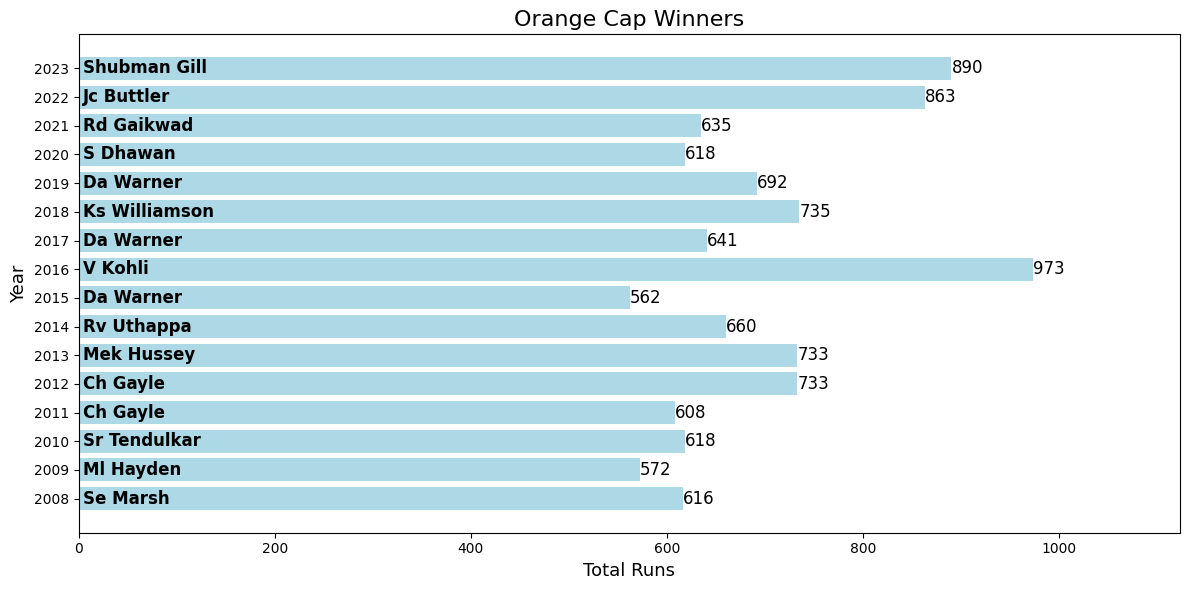

In [51]:
 plt.figure(figsize = (12,6))
 plt.barh(orange_cap_winners['Year'].astype(str), orange_cap_winners['Total Runs in Season'], color = 'lightblue')
 plt.xlabel('Total Runs', fontsize = 13)
 plt.ylabel('Year', fontsize = 13)
 plt.title('Orange Cap Winners', fontsize = 16)


 for i, (year,batter,runs) in enumerate(zip(orange_cap_winners['Year'], orange_cap_winners['Batter'], orange_cap_winners['Total Runs in Season'])):
  plt.text(5,i,batter,ha='left',va='center', fontsize = 12, fontweight = 'bold')
  plt.text(runs,i,runs,ha='left',va='center', fontsize = 12 )

plt.xlim(0,orange_cap_winners['Total Runs in Season'].max() + 150)
plt.tight_layout()
plt.show()


**2.Which batsman hitted the most sixes in each IPL season?**

In [52]:
batter_sixes = df.groupby(['Year', 'Batter'])['is_six'].sum().reset_index()
top_six_hitter_idx = batter_sixes.groupby('Year')['is_six'].idxmax()
most_sixes_per_year = batter_sixes.loc[top_six_hitter_idx]
most_sixes_per_year = most_sixes_per_year.rename(columns={'is_six': 'Total Sixes'})


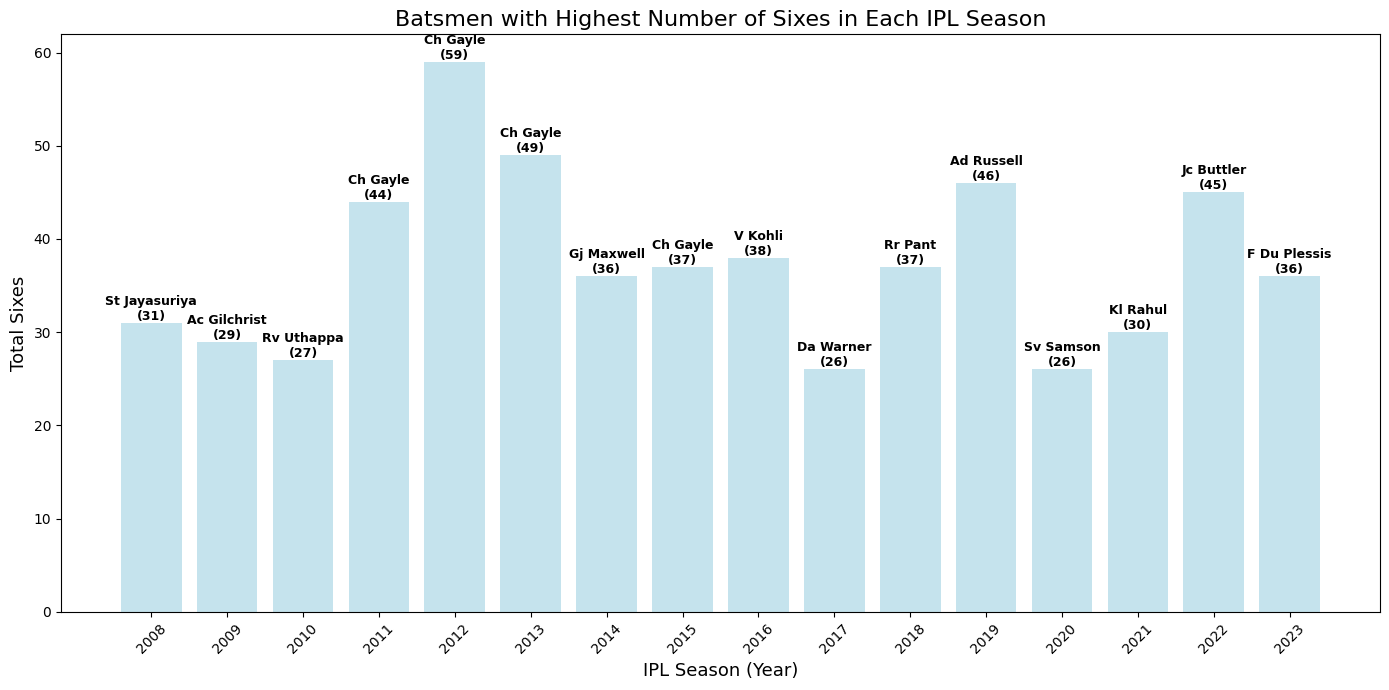

In [53]:
plt.figure(figsize=(14, 7))
bars = plt.bar(most_sixes_per_year['Year'].astype(str), most_sixes_per_year['Total Sixes'], color='lightblue', alpha=0.7)
for bar, batter, sixes in zip(bars, most_sixes_per_year['Batter'], most_sixes_per_year['Total Sixes']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{batter}\n({sixes})',ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.xlabel('IPL Season (Year)', fontsize=13)
plt.ylabel('Total Sixes', fontsize=13)
plt.title('Batsmen with Highest Number of Sixes in Each IPL Season', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3.Who took the highest wickets in each IPL season (Purple Cap winners)?**

In [65]:
wickets_per_year = df.groupby(['Year','Bowler'] )['bowler_wickets'].sum().reset_index()
top_wickets_taker_idx = wickets_per_year.groupby('Year')['bowler_wickets'].idxmax()
top_wickets_takers = wickets_per_year.loc[top_wickets_taker_idx]
top_wickets_takers = top_wickets_takers.rename(columns = {'bowler_wickets':'Total Wickets'})



In [67]:
top_wickets_takers

,Year,Bowler,Total Wickets
82,2008,Sohail Tanvir,22
174,2009,Rp Singh,23
285,2010,Pp Ojha,21
447,2011,Sl Malinga,28
536,2012,M Morkel,25
625,2013,Dj Bravo,32
773,2014,Mm Sharma,23
840,2015,Dj Bravo,26
929,2016,B Kumar,23
1039,2017,B Kumar,26


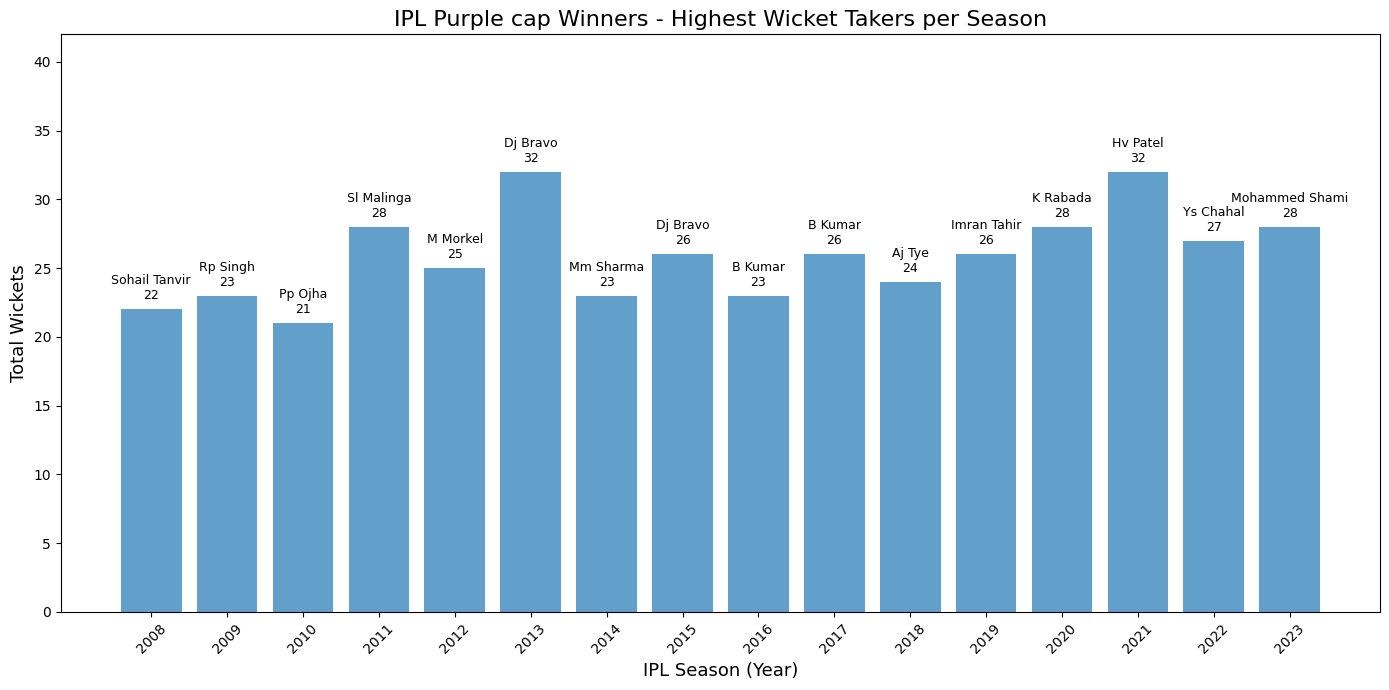

In [84]:
plt.figure(figsize=(14,7))
bars = plt.bar(top_wickets_takers['Year'].astype(str), top_wickets_takers['Total Wickets'], alpha = 0.7)
for bar, bowler, wickets in zip(bars, top_wickets_takers['Bowler'], top_wickets_takers['Total Wickets']):
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.5,f'{bowler}\n{wickets}', ha = 'center',va = 'bottom',fontsize = 9)
plt.xlabel('IPL Season (Year)', fontsize = 13)
plt.ylabel('Total Wickets', fontsize = 13)
plt.title('IPL Purple cap Winners - Highest Wicket Takers per Season', fontsize = 16)
plt.xticks(rotation = 45)
plt.ylim(0,top_wickets_takers['Total Wickets'].max() + 10)
plt.tight_layout()


**4.Which bowler delivered the highest number of dot balls in each IPL season?**

In [89]:
dot_balls_per_bowler = df.groupby(['Year','Bowler'])['is_dot_ball'].sum().reset_index()
top_dot_bowlers_idx = dot_balls_per_bowler.groupby('Year')['is_dot_ball'].idxmax()
top_dot_bowlers =  dot_balls_per_bowler.loc[top_dot_bowlers_idx]
top_dot_bowlers = top_dot_bowlers.rename(columns = {'is_dot_ball':'Total Dot Balls'})
top_dot_bowlers

,Year,Bowler,Total Dot Balls
83,2008,Sr Watson,158
174,2009,Rp Singh,169
244,2010,Dw Steyn,164
447,2011,Sl Malinga,183
544,2012,P Kumar,168
632,2013,Dw Steyn,202
728,2014,Ar Patel,157
824,2015,A Nehra,170
929,2016,B Kumar,156
1113,2017,Sp Narine,133


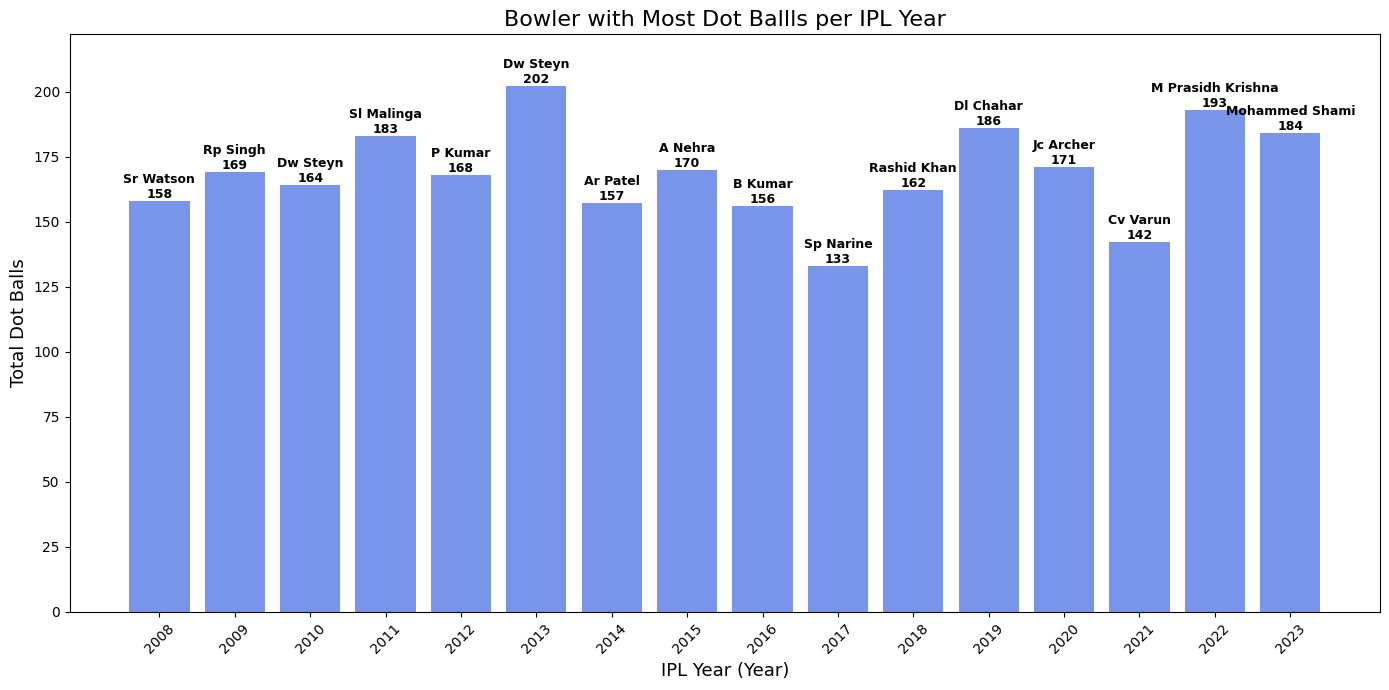

In [96]:
plt.figure(figsize = (14,7))
bars = plt.bar(top_dot_bowlers['Year'].astype(str), top_dot_bowlers['Total Dot Balls'], color = 'royalblue', alpha = 0.7)
for bar, bowler, dots in zip(bars, top_dot_bowlers['Bowler'], top_dot_bowlers['Total Dot Balls']):
  plt.text(bar.get_x() + bar.get_width()/2,bar.get_height(), f'{bowler}\n{dots}',ha = 'center',va='bottom', fontsize = 9, fontweight='bold',color = 'black')

plt.xlabel('IPL Year (Year)', fontsize = 13)
plt.ylabel('Total Dot Balls',fontsize = 13)
plt.title('Bowler with Most Dot Ballls per IPL Year',fontsize=16)
plt.xticks(rotation = 45)
plt.ylim(0,top_dot_bowlers['Total Dot Balls'].max() + 20)
plt.tight_layout()